<a href="https://colab.research.google.com/github/Min-Yi/data/blob/master/insurance_scaled_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import scipy
from PIL import Image
from sklearn import metrics

insur = pd.read_csv('insurance.csv',header = 1,names = ['age','sex','bmi','children','smoker','region','charges']) 
insur.head()

Saving insurance.csv to insurance (2).csv


,age,sex,bmi,children,smoker,region,charges
0,18,male,33.770,1,no,southeast,1725.55230
1,28,male,33.000,3,no,southeast,4449.46200
2,33,male,22.705,0,no,northwest,21984.47061
3,32,male,28.880,0,no,northwest,3866.85520
4,31,female,25.740,0,no,southeast,3756.62160


In [0]:
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


# PLOT ORIGINAL DATA

In [0]:
#distributon of charges
plt.title("Frequency Distribution of Charges")
sns.distplot(insur['charges'])
plt.ylabel('Frequency')
plt.xlabel('Age')


In [0]:
#see distribution of age
plt.title("Distribution of Age")
sns.distplot(insur['age'], bins=20, kde= False, rug=True)
plt.ylabel('Frequency')
plt.xlabel('Age')

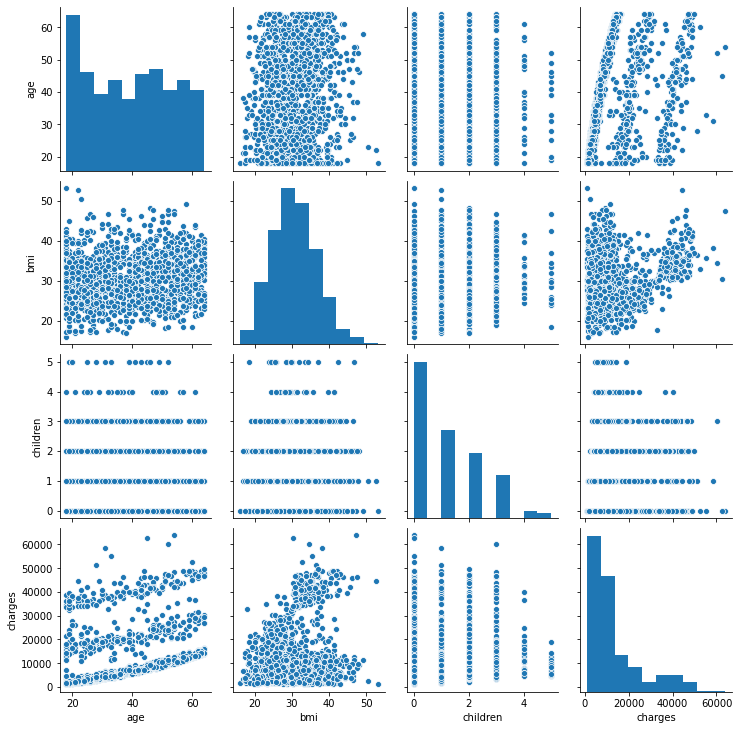

In [0]:
#look at relationship across dataset
sns.pairplot(insur)

Text(0.5, 1.0, 'Female and Male Charges')

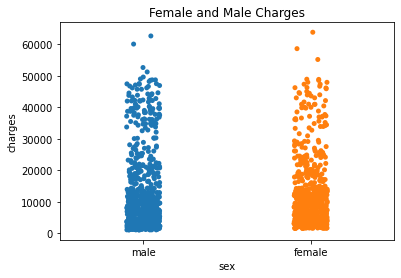

In [0]:
#charges by gender
 #data shows there does not appear to be gender biasing
sns.stripplot(x='sex',y='charges',data=insur)
plt.title('Female and Male Charges')

In [0]:
#charts involving smokers and non-smokers

#compare charges between smokers and non smokers
sns.stripplot(x='smoker',y='charges',data=insur)

#charges of smokers and non-smokers and age
sns.lmplot(x='age',y='charges',hue='smoker',data=insur,palette='inferno_r')

#charges between smokers and non-smokers with increasing BMIs
sns.lmplot(x="bmi",y='charges',hue='smoker',data=insur)

#general charges between smokers and non-smokers
g = sns.FacetGrid(data=insur,col='smoker')
g.map(sns.distplot,'charges',bins=30,kde=False)

In [0]:
#children and charges
sns.barplot(x='children',y='charges',data = insur)


NameError: ignored

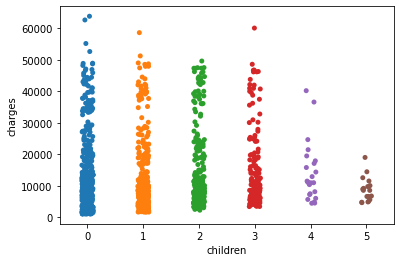

In [0]:
#plot number of children vs charges
sns.stripplot(x='children',y='charges',data=insur)

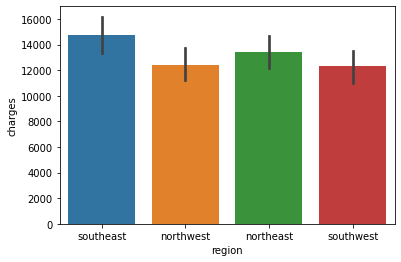

In [0]:
#region and charges
sns.barplot(x='region',y='charges',data = insur)


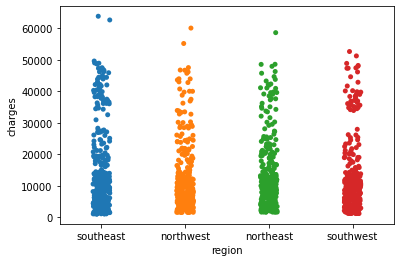

In [0]:
#region and charges
sns.stripplot(x='region',y='charges',data=insur)

Text(0.5, 1.0, 'Correlation Between BMI and Regions')

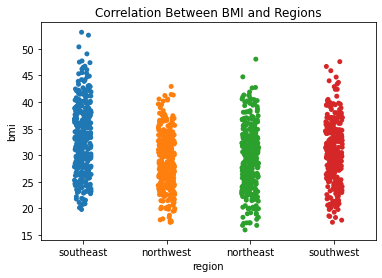

In [0]:
#region and bmi
sns.stripplot(x='region',y='bmi',data=insur)
plt.title("Correlation Between BMI and Regions")

# FORMAT DATA
---



In [0]:
#use dummy variables to convert text data to numerical data
insur =pd.concat(     [insur,
                      pd.get_dummies(insur.sex),
                      pd.get_dummies(insur.smoker),
                      pd.get_dummies(insur.region)], axis=1)
 
 #remove old categorical data
insur.drop(['sex'], axis=1, inplace=True)
insur.drop(['smoker'], axis=1, inplace=True)
insur.drop(['region'], axis=1, inplace=True)

#create dummy variables for region
#insur=pd.get_dummies(insur, columns=['region'])
#insur.drop('region_northeast', axis=1, inplace=True)

#assign features and labels
x = insur.drop(['charges'],axis=1)
y = insur['charges']


# TRAIN TEST SPLIT

In [27]:
#train test split 
from sklearn.model_selection import train_test_split
train_set_x,  test_set_x, train_set_y,test_set_y = train_test_split(x, y, test_size = 0.2, random_state = 0)

#scale data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(train_set_x)
train_set_x = scaler.transform(train_set_x)
test_set_x = scaler.transform(test_set_x)
#print(train_set_y)

#view data
print("train_set_x: ", train_set_x.shape)
print("train_set_y: ", train_set_y.shape)
print("test_set_x: ", test_set_x.shape)
print("test_set_y: ", test_set_y.shape)

#reshape labels to get rid of rank arrays
#nt("\nReshaped values: ")
#train_set_y= train_set_y.values.reshape(train_set_y.shape[0],1)
#test_set_y = test_set_y.values.reshape(test_set_y.shape[0],1)
#print("train_set_x: ", train_set_x.shape)
#print("train_set_y: ", train_set_y.shape)
#print("test_set_x: ", test_set_x.shape)
#print("test_set_y: ", test_set_y.shape)


train_set_x:  (1069, 11)
train_set_y:  (1069,)
test_set_x:  (268, 11)
test_set_y:  (268,)


# LINEAR REGRESSION


Reshaped values: 
train_set_x:  (1069, 11)
train_set_y:  (1069, 1)
test_set_x:  (268, 11)
test_set_y:  (268, 1)
Coefficients: 
 [[ 3395.55793888  1907.88295073   496.23795457    62.27450977
    -62.27450977 -4793.43776716  4793.43776716   275.06049995
     72.99016072  -173.05880365  -160.05462508]]

training prediction:  0.7466188871587394
testing predicition:  0.7625860317157389


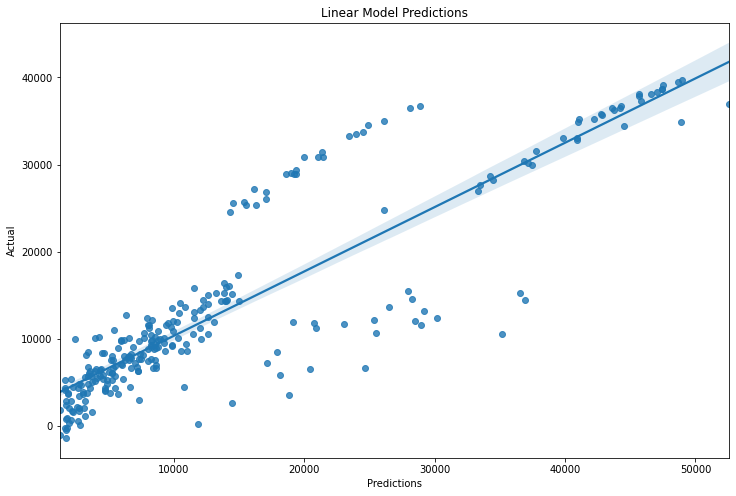

In [28]:
print("\nReshaped values: ")
train_set_y= train_set_y.values.reshape(train_set_y.shape[0],1)
test_set_y = test_set_y.values.reshape(test_set_y.shape[0],1)
print("train_set_x: ", train_set_x.shape)
print("train_set_y: ", train_set_y.shape)
print("test_set_x: ", test_set_x.shape)
print("test_set_y: ", test_set_y.shape)


#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(train_set_x,train_set_y)

#Coefficients
coef=regr.coef_
print('Coefficients: \n', coef)

#predicitions
y_train_pred = regr.predict(train_set_x)
y_test_pred = regr.predict(test_set_x)

print("\ntraining prediction: ",regr.score(train_set_x, train_set_y))
print("testing predicition: ", regr.score(test_set_x, test_set_y))

#plot regression of test vals vs predicted
plt.figure(figsize=(12,8))
sns.regplot(test_set_y, y_test_pred)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()


In [0]:
#plot residuals
sns.distplot((test_set_y - y_test_pred),bins=50);

In [35]:
import statsmodels.api as sm 

model =sm.OLS(train_set_y,train_set_x)
results =model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.337
Model:                            OLS   Adj. R-squared (uncentered):              0.332
Method:                 Least Squares   F-statistic:                              67.43
Date:                Thu, 14 May 2020   Prob (F-statistic):                    1.90e-89
Time:                        21:03:52   Log-Likelihood:                         -11751.
No. Observations:                1069   AIC:                                  2.352e+04
Df Residuals:                    1061   BIC:                                  2.356e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [0]:
coefficients = pd.DataFrame(coef[0],insur.columns)
column= pd.DataFrame(x.columns)
coefficients.columns = ['Coefficient']
coefficients

In [36]:
#Calculations:
###print mean absolute error (calculates amount of error in project)
print('MAE (Absolute error ):', metrics.mean_absolute_error(test_set_y, y_test_pred))
###print mean squared error (average of all absolute errors)
print('MSE (average of all absolute errors):', metrics.mean_squared_error(test_set_y, y_test_pred))
###print root mean squared error(predicts avg. y value associated with x value)
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_set_y, y_test_pred)))

#calculate r squared (test accuracy)
SS_Residual = sum((test_set_y-y_test_pred)**2)
SS_Total = sum((test_set_y-np.mean(test_set_y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
print('R Squared (Test accuracy):', r_squared)




MAE (Absolute error ): 4372.133215179287
MSE (average of all absolute errors): 40206204.37304326
RMSE: 6340.836251871141
R Squared (Test accuracy): [0.76258603]


# PLOT REGRESSION

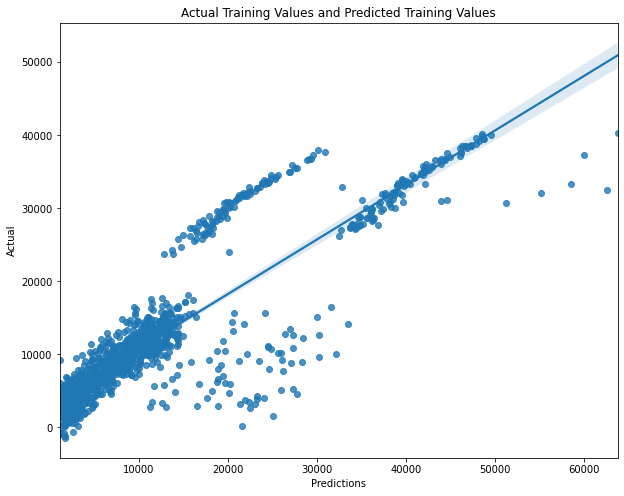

In [30]:
plt.figure(figsize=(10,8))
p=y_train_pred
len(train_set_x)
sns.regplot(train_set_y,p)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Actual Training Values and Predicted Training Values")
plt.grid(False)
plt.show()

In [0]:
plt.figure(figsize=(10,8))
pr=y_test_pred
plt.title('Plot Between Actual and Predicted Values in Test Set')
sns.regplot(test_set_y,pr, color='cyan')
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.show()

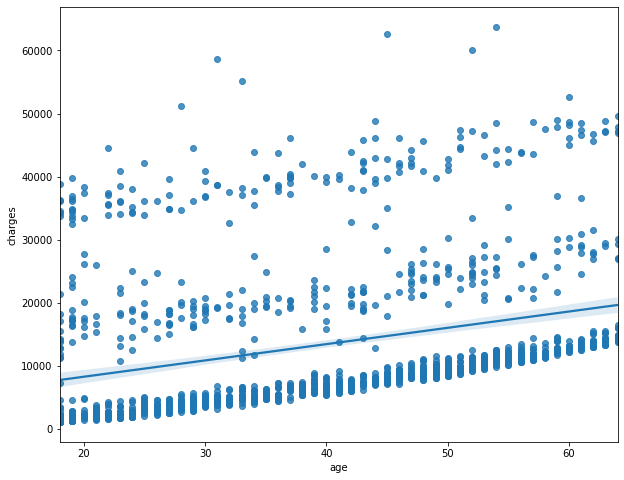

In [32]:
#age and charges regression
plt.figure(figsize=(10,8))
sns.regplot(x='age',y='charges', data = insur)

<Figure size 720x576 with 0 Axes>

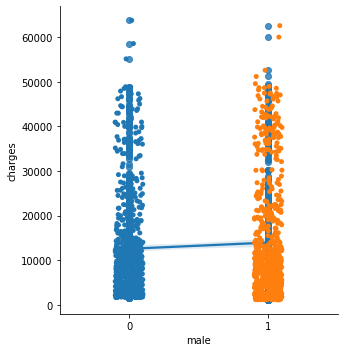

In [33]:
#charges and genders
plt.figure(figsize=(10,8))
sns.lmplot(x='male',y='charges', data = insur)
sns.stripplot(x='male',y='charges',data=insur)


<Figure size 720x576 with 0 Axes>

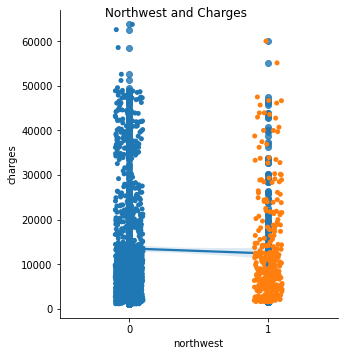

<Figure size 720x576 with 0 Axes>

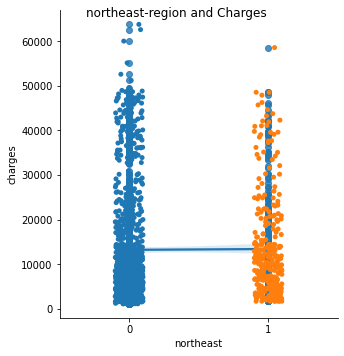

<Figure size 720x576 with 0 Axes>

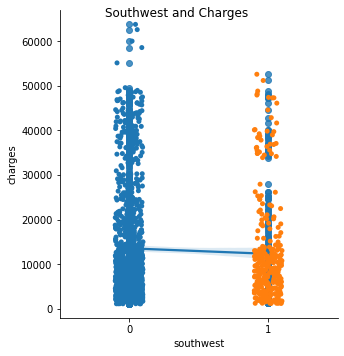

<Figure size 720x576 with 0 Axes>

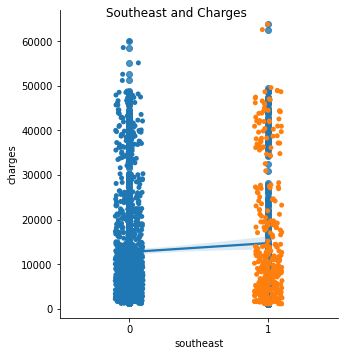

In [0]:
#charges and region
#northwest
plt.figure(figsize=(10,8))
r_nw= sns.lmplot(x='northwest',y='charges', data = insur)
r_nw.fig.suptitle('Northwest and Charges')
sns.stripplot(x='northwest',y='charges',data=insur)

#northeast
plt.figure(figsize=(10,8))
r_sw=sns.lmplot(x='northeast',y='charges', data = insur)
r_sw.fig.suptitle('northeast-region and Charges')
sns.stripplot(x='northeast',y='charges',data=insur)

#southwest
plt.figure(figsize=(10,8))
r_sw=sns.lmplot(x='southwest',y='charges', data = insur)
r_sw.fig.suptitle('Southwest and Charges')
sns.stripplot(x='southwest',y='charges',data=insur)

#southeast
plt.figure(figsize=(10,8))
r_sw=sns.lmplot(x='southeast',y='charges', data = insur)
r_sw.fig.suptitle('Southeast and Charges')
sns.stripplot(x='southeast',y='charges',data=insur)


In [0]:
#children and charges
#plot number of children vs charges
plt.figure(figsize=(16, 6))
plt.figure(figsize=(10,8))
sns.lmplot(x='children', y='charges', data=insur)
sns.stripplot(x='children', y='charges', data=insur)
plt.title('Children and Charges')
plt.xlabel("Number of Children")
plt.ylabel('Charges')

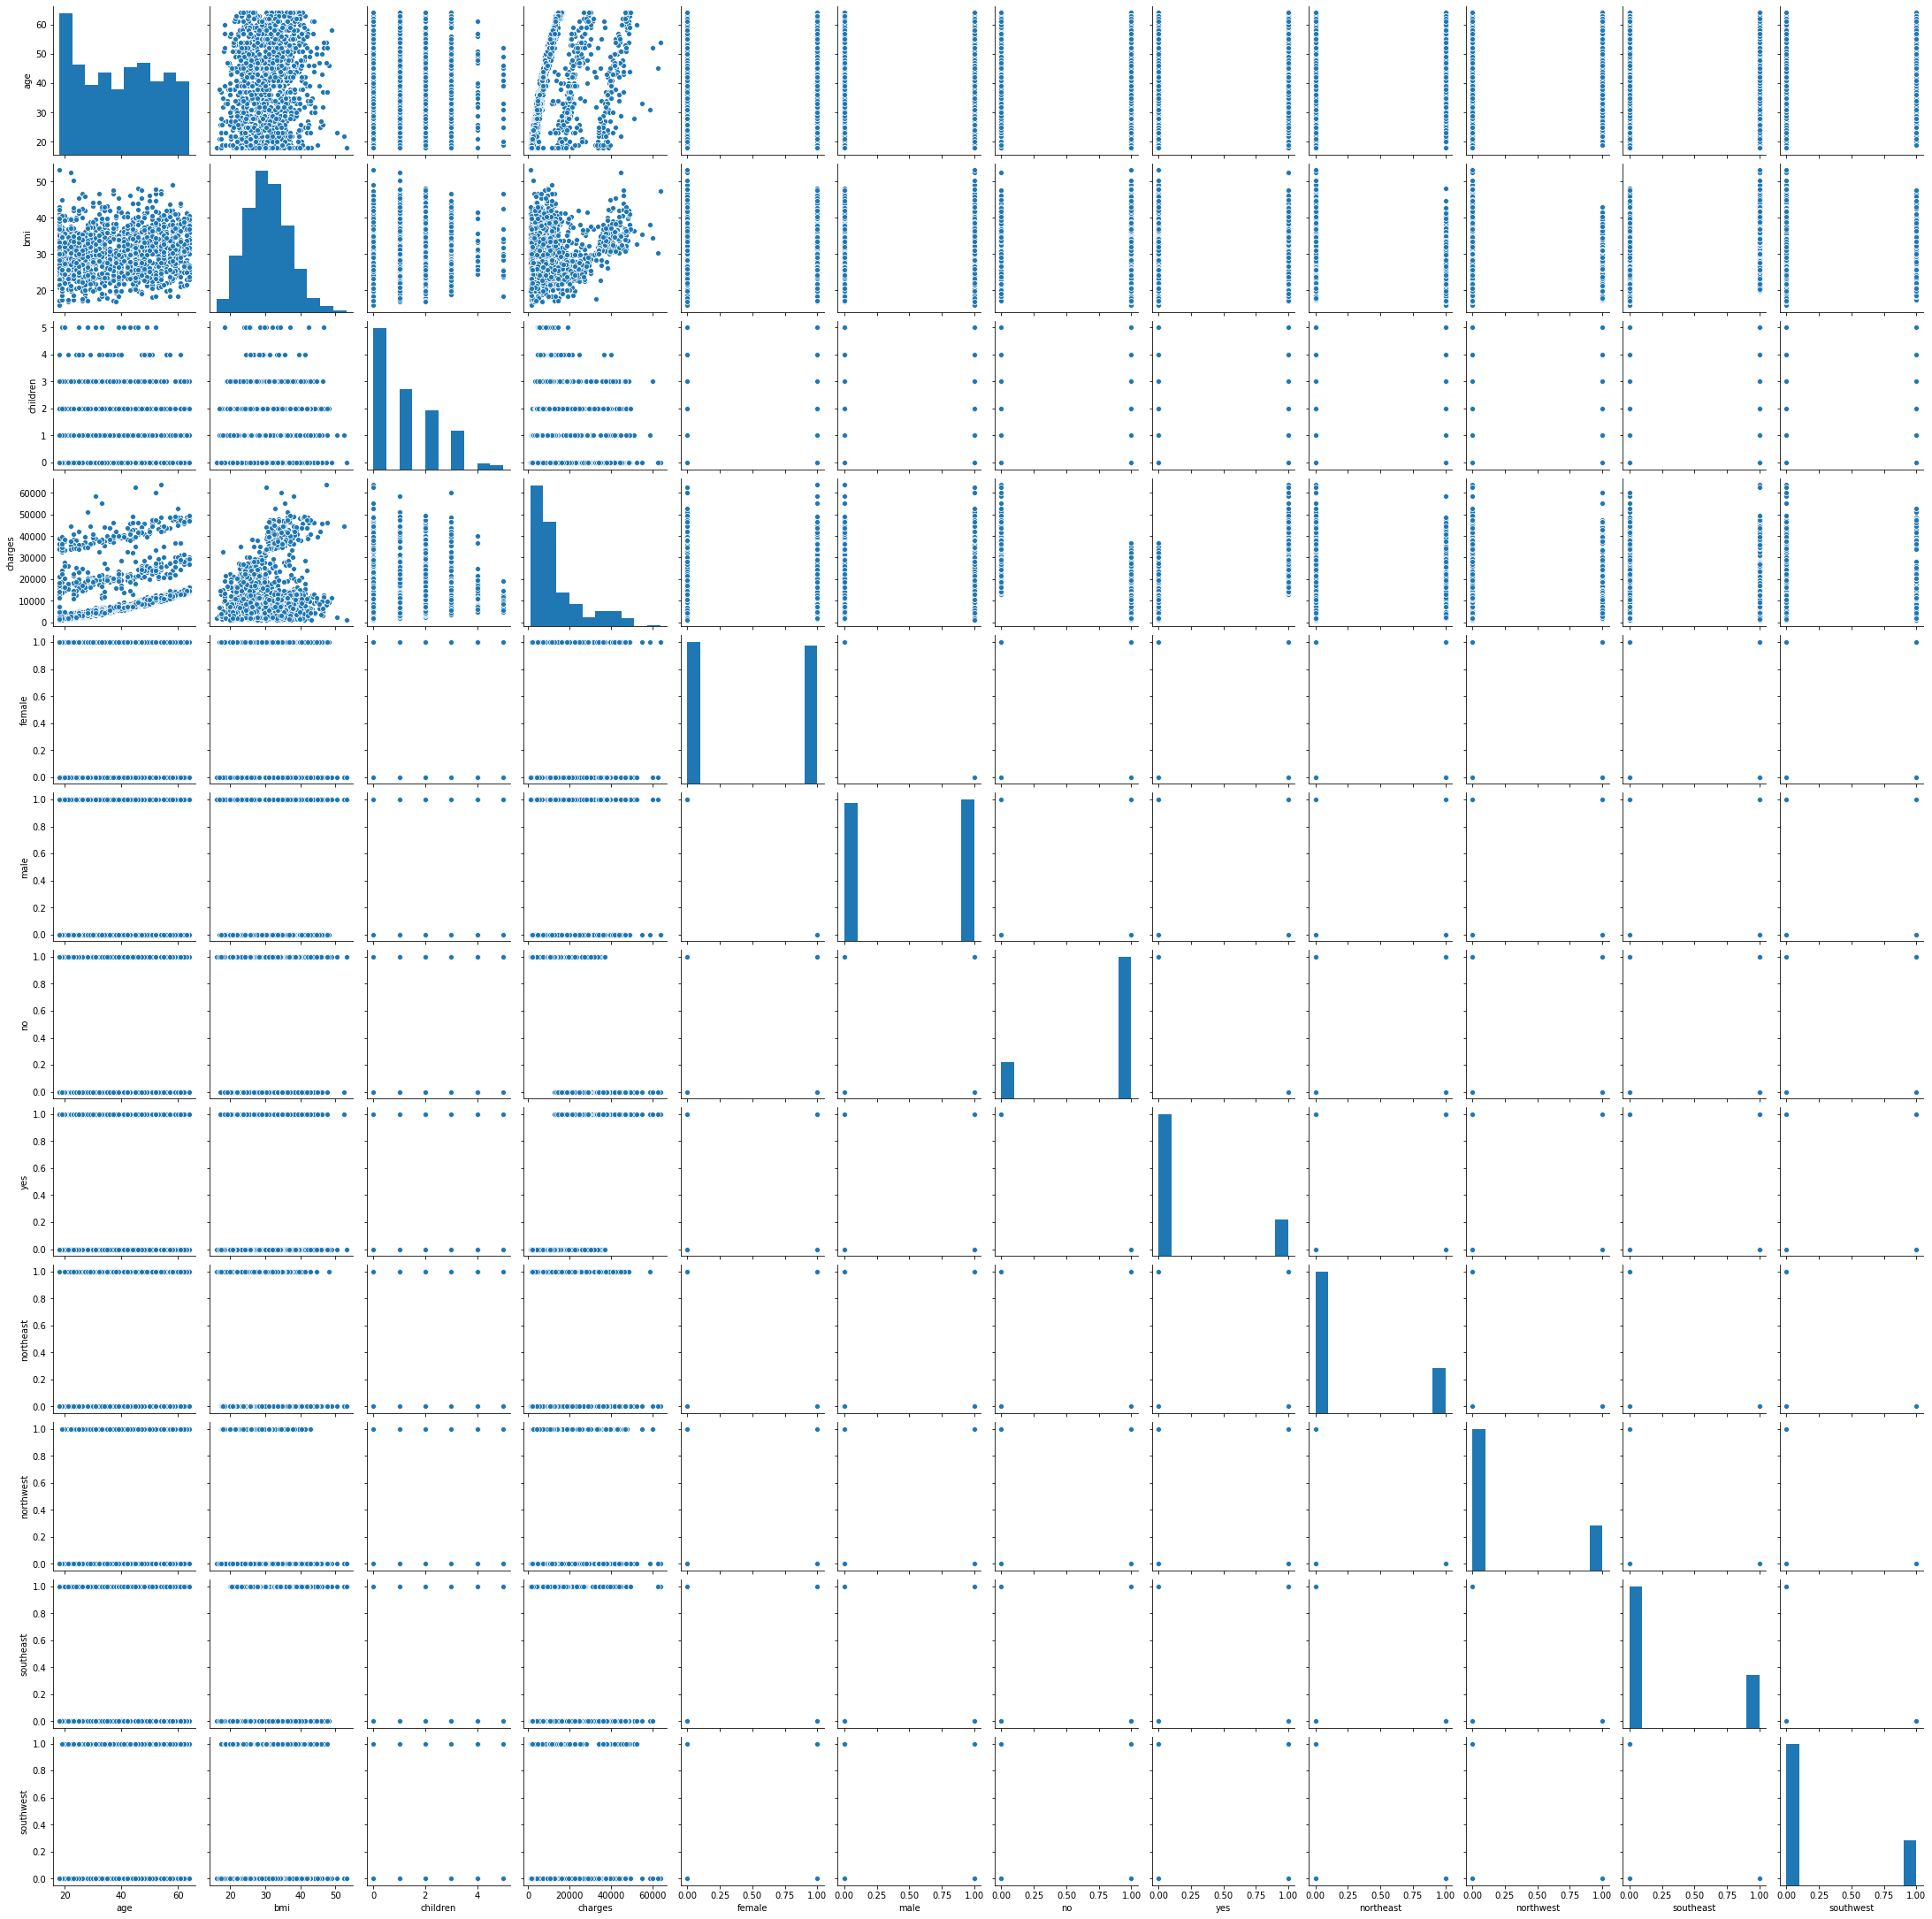

In [0]:
#look at relationship across dataset
sns.pairplot(insur)